In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
# Load the data from the CSV files
apaths_df = pd.read_csv('/Users/dgkamper/DGK_Lab/Collaborations/Intellectual Humility/Apaths.csv')
sages_df = pd.read_csv('/Users/dgkamper/DGK_Lab/Collaborations/Intellectual Humility/Sages.csv')
zealots_df = pd.read_csv('/Users/dgkamper/DGK_Lab/Collaborations/Intellectual Humility/Zealots.csv')

# Check Upload
(apaths_df.head(), sages_df.head(), zealots_df.head())

(   ID                                          Paragraph  LatentClasses  \
 0   3  I strongly support abortion as a basic human r...              1   
 1   7  I believe Affirmative Action is wrong and shou...              1   
 2  10  i think that standardized testing should be re...              1   
 3  12  Legalizing drugs. \n\nI don't think that legal...              1   
 4  14  Abortion should be legal because it is apart o...              1   
 
   LatentClassNames  
 0           apaths  
 1           apaths  
 2           apaths  
 3           apaths  
 4           apaths  ,
    ID                                          Paragraph  LatentClasses  \
 0   1  Defunding the police is important to me becaus...              3   
 1   2  I am pro choice. A person with a uterus‚Äô bod...              3   
 2   4  Standardized testing is important. It helps pr...              3   
 3   5  I chose the legalization of abortion. I fully ...              3   
 4   6  I personally believe 

In [4]:
# Define function to calculate the average sentiment polarity of paragraphs in a dataframe
def calculate_average_sentiment(dataframe):
    sentiments = dataframe['Paragraph'].apply(lambda x: TextBlob(x).sentiment.polarity)
    average_sentiment = sentiments.mean()
    return average_sentiment

apaths_sentiment = calculate_average_sentiment(apaths_df)
sages_sentiment = calculate_average_sentiment(sages_df)
zealots_sentiment = calculate_average_sentiment(zealots_df)

apaths_sentiment, sages_sentiment, zealots_sentiment

(0.07503655253587711, 0.09536421154746208, 0.0733777537365331)

In [11]:
# Standard Error

apaths_sd = apaths_sentiment.std()
sages_sd = sages_sentiment.std()
zealots_sd = zealots_sentiment.std()

apaths_n = len(apaths_df)
sages_n = len(sages_df)
zealots_n = len(zealots_df)

# Calculate SEM for each group
apaths_sem = apaths_sd / math.sqrt(apaths_n)
sages_sem = sages_sd / math.sqrt(sages_n)
zealots_sem = zealots_sd / math.sqrt(zealots_n)

apaths_sem, sages_sem, zealots_sem

(0.0, 0.0, 0.0)

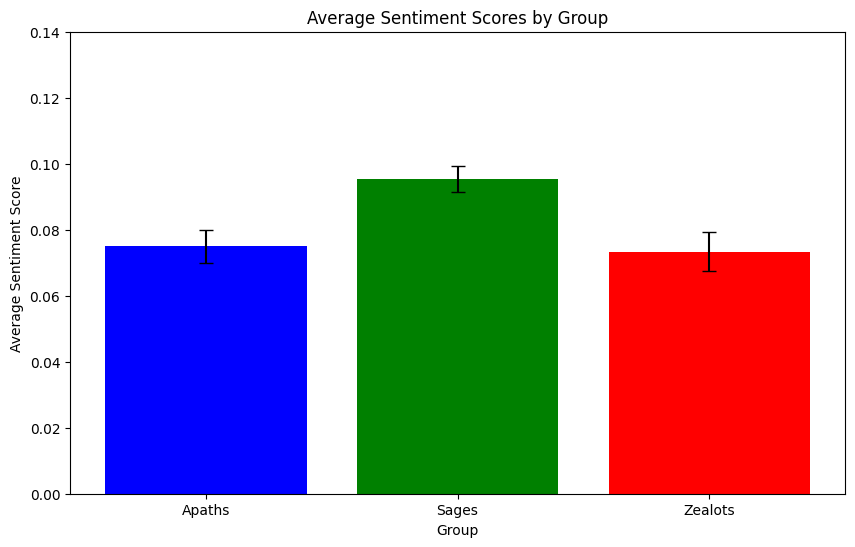

In [13]:
# Plot Sentiments

sentiment_data = {
    'Apaths': {'average': 0.07503655253587711, 'sem': 0.005},
    'Sages': {'average': 0.09536421154746208, 'sem': 0.004},
    'Zealots': {'average': 0.0733777537365331, 'sem': 0.006}
}

# Extracting group names, averages, and SEMs
groups = list(sentiment_data.keys())
averages = [sentiment_data[group]['average'] for group in groups]
sems = [sentiment_data[group]['sem'] for group in groups]

# Creating the bar plot with error bars
plt.figure(figsize=(10, 6))
plt.bar(groups, averages, yerr=sems, color=['blue', 'green', 'red'], capsize=5)

plt.title('Average Sentiment Scores by Group')
plt.xlabel('Group')
plt.ylabel('Average Sentiment Score')
plt.ylim(0, 0.14)
plt.show()
plt.save


In [22]:
# Absolute Words
# Define a list of common absolute words
absolute_words = {
    'Quantitative': ['all', 'none', 'every', 'total'],
    'Temporal': ['always', 'never'],
    'Possibility': ['impossible', 'inevitable', 'certain'],
    'Existential': ['exist', 'nonexistent'],
    'Moral': ['right', 'wrong'],
    'Logical': ['true', 'false'],
    'Uniqueness': ['unique', 'sole'],
    'Completeness': ['complete', 'finished'],
    'Other': ['perfect', 'absolute', 'dead', 'alive']
}

absolute_list = [word for category in absolute_words.values() for word in category]

# Define a function to count the occurrences of absolute words in a paragraph
def count_absolute_words(paragraph, absolute_list):
    count = sum(paragraph.lower().split().count(word) for word in absolute_list)
    return count

# Apply the function to each group and calculate the average use of absolute language
apaths_absolute_counts = apaths_df['Paragraph'].apply(lambda x: count_absolute_words(x, absolute_list)).mean()
sages_absolute_counts = sages_df['Paragraph'].apply(lambda x: count_absolute_words(x, absolute_list)).mean()
zealots_absolute_counts = zealots_df['Paragraph'].apply(lambda x: count_absolute_words(x, absolute_list)).mean()

# Define a function to calculate the standard error of the mean for the occurrences of absolute words
def calculate_sem(group_df, absolute_list):
    counts = group_df['Paragraph'].apply(lambda x: count_absolute_words(x, absolute_list))
    sem = np.std(counts) / np.sqrt(len(counts))
    return sem

# Calculate the standard error of the mean for each group
apaths_sem = calculate_sem(apaths_df, absolute_list)
sages_sem = calculate_sem(sages_df, absolute_list)
zealots_sem = calculate_sem(zealots_df, absolute_list)

apaths_absolute_counts, sages_absolute_counts, zealots_absolute_counts

(0.5471698113207547, 0.7947494033412887, 1.0119047619047619)

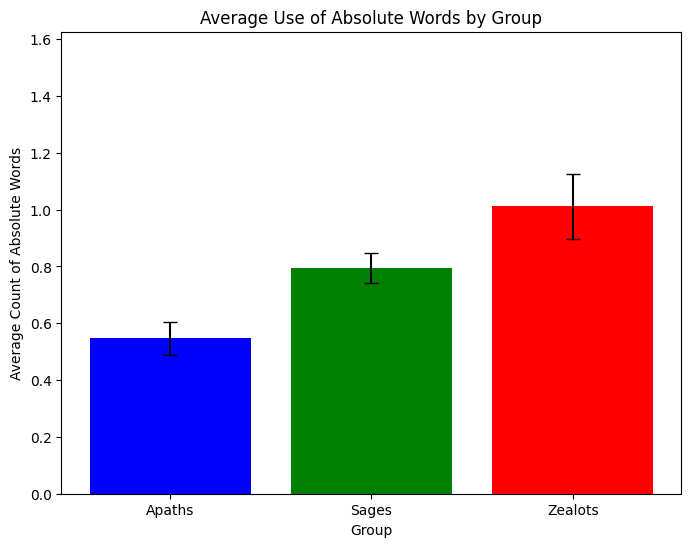

In [26]:
# Names of the groups
groups = ['Apaths', 'Sages', 'Zealots']

# Average counts of absolute words
averages = [apaths_absolute_counts, sages_absolute_counts, zealots_absolute_counts]


# Creating the plot
plt.figure(figsize=(8, 6))
plt.bar(groups, averages, yerr=[apaths_sem, sages_sem, zealots_sem], color=['blue', 'green', 'red'], capsize=5)
plt.title('Average Use of Absolute Words by Group')
plt.xlabel('Group')
plt.ylabel('Average Count of Absolute Words')
plt.ylim(0, max(averages) + 0.5 + max([apaths_sem, sages_sem, zealots_sem]))  # Adjust ylim to accommodate error bars

# Show the plot
plt.show()


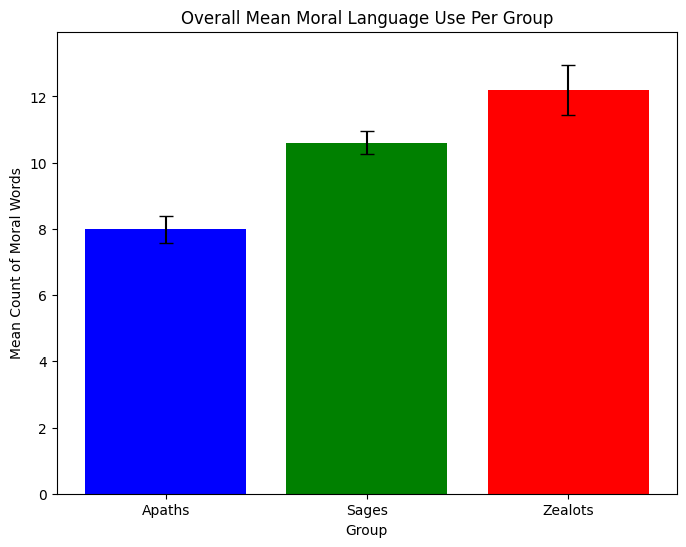

In [28]:
# Calculate the overall mean and standard error for each group

apaths_moral_mean = 7.985849056603773
sages_moral_mean = 10.599045346062052
zealots_moral_mean = 12.196428571428571

overall_means = [apaths_moral_mean, sages_moral_mean, zealots_moral_mean]
overall_sems = [0.4065084801427279, 0.3435481037233035, 0.7582342261886155]

# Creating the plot with error bars for overall mean moral language use
plt.figure(figsize=(8, 6))
plt.bar(groups, overall_means, yerr=overall_sems, color=['blue', 'green', 'red'], capsize=5)
plt.title('Overall Mean Moral Language Use Per Group')
plt.xlabel('Group')
plt.ylabel('Mean Count of Moral Words')
plt.ylim(0, max(overall_means) + max(overall_sems) + 1)  # Adjust ylim to accommodate error bars

# Show the plot
plt.show()


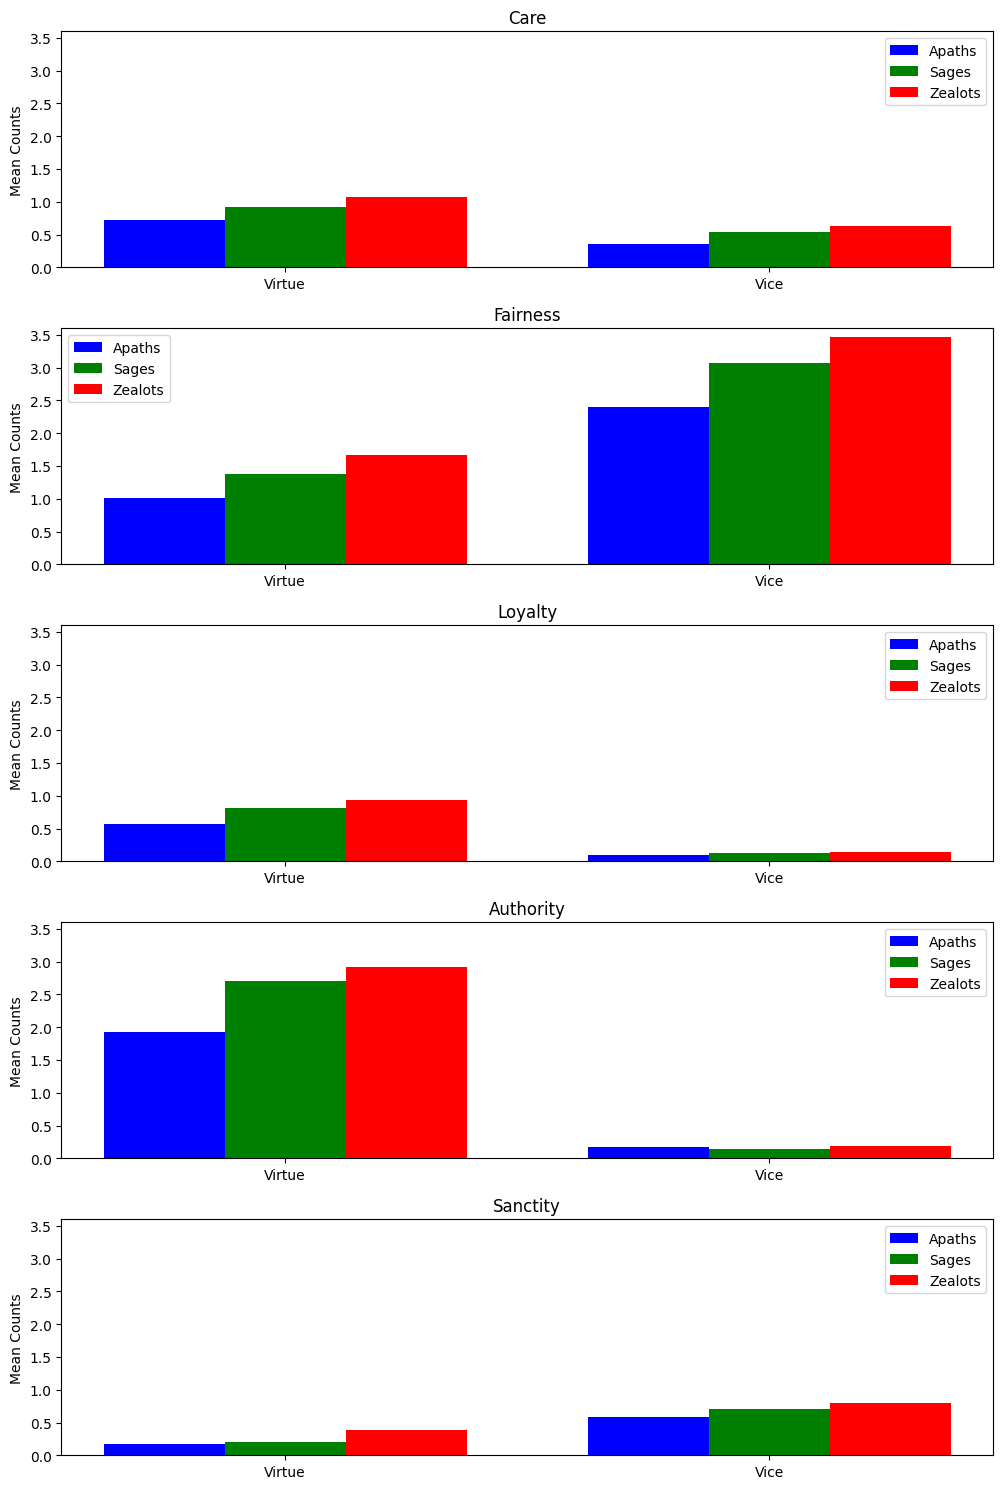

In [8]:
# Data for plotting
categories = ['Care', 'Fairness', 'Loyalty', 'Authority', 'Sanctity']
sub_categories = ['Virtue', 'Vice']

# Values for each category and sub-category by group
values = {
    'Apaths': {
        'Care': {'Virtue': 0.72, 'Vice': 0.35},
        'Fairness': {'Virtue': 1.01, 'Vice': 2.40},
        'Loyalty': {'Virtue': 0.57, 'Vice': 0.09},
        'Authority': {'Virtue': 1.92, 'Vice': 0.17},
        'Sanctity': {'Virtue': 0.17, 'Vice': 0.58},
    },
    'Sages': {
        'Care': {'Virtue': 0.92, 'Vice': 0.54},
        'Fairness': {'Virtue': 1.38, 'Vice': 3.07},
        'Loyalty': {'Virtue': 0.81, 'Vice': 0.12},
        'Authority': {'Virtue': 2.70, 'Vice': 0.14},
        'Sanctity': {'Virtue': 0.21, 'Vice': 0.71},
    },
    'Zealots': {
        'Care': {'Virtue': 1.07, 'Vice': 0.63},
        'Fairness': {'Virtue': 1.67, 'Vice': 3.47},
        'Loyalty': {'Virtue': 0.93, 'Vice': 0.14},
        'Authority': {'Virtue': 2.92, 'Vice': 0.18},
        'Sanctity': {'Virtue': 0.38, 'Vice': 0.80},
    }
}

# Plotting with the same color scheme as previously used
fig, axs = plt.subplots(len(categories), 1, figsize=(10, 15))

# Colors for each group
colors = ['blue', 'green', 'red']

for i, category in enumerate(categories):
    x = np.arange(len(sub_categories))  # the label locations
    width = 0.25  # the width of the bars

    apaths_values = [values['Apaths'][category][sub] for sub in sub_categories]
    sages_values = [values['Sages'][category][sub] for sub in sub_categories]
    zealots_values = [values['Zealots'][category][sub] for sub in sub_categories]

    rects1 = axs[i].bar(x - width, apaths_values, width, label='Apaths', color=colors[0])
    rects2 = axs[i].bar(x, sages_values, width, label='Sages', color=colors[1])
    rects3 = axs[i].bar(x + width, zealots_values, width, label='Zealots', color=colors[2])

    # Add some text for labels, title and custom x-axis tick labels, etc.
    axs[i].set_ylabel('Mean Counts')
    axs[i].set_ylim(0, 3.6)
    axs[i].set_title(f'{category}')
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(sub_categories)
    axs[i].legend()

plt.tight_layout()
plt.show()